In [1]:
%matplotlib notebook
import h5py
from psana import DataSource
import numpy as np
import matplotlib.pyplot as plt
import os

def my_smalldata(data_dict):
    print(data_dict)
    
os.environ['PS_SRV_NODES']='1'

run = 609
ds = DataSource(exp='rixx43518', run=run, dir='/reg/data/ana03/rix/rixx43518/xtc')
myrun = next(ds.runs())

smd = ds.smalldata(filename='smalldata%03d.h5' %(run))#, callbacks=[my_smalldata])

# check non-epics detector names:
# myrun.xtcinfo
#
# check epics detector names:
# myrun.epicsinfo
#
# check scan variables (e.g. 'step_value'):
# myrun.scaninfo

manta = myrun.Detector('manta')
gmd = myrun.Detector('gmd')
xgmd = myrun.Detector('xgmd')
ebeam = myrun.Detector('ebeam')
timing = myrun.Detector('timing')
epics = myrun.Detector('epics')

x0, x1 = 1000, 1050
y0, y1 = 400, 950

proj1 = np.zeros(y1 - y0)
imgsum = np.zeros((2048, 2048))

nevents = 0
nevents1 = 0
for evt in myrun.events():
    nevents1 += 1
    img = manta.raw.value(evt)
    GMDenergy = gmd.raw.energy(evt)
    GMDavgIntensity = gmd.raw.avgIntensity(evt)
    GMDelectron1BkgNoiseAvg = gmd.raw.electron1BkgNoiseAvg(evt)
    GMDelectron2BkgNoiseAvg = gmd.raw.electron2BkgNoiseAvg(evt)
    GMDrmsElectronSum = gmd.raw.rmsElectronSum(evt)
    GMDxpos = gmd.raw.xpos(evt)
    GMDypos = gmd.raw.ypos(evt)
    photonEnergy = ebeam.raw.ebeamPhotonEnergy(evt)
    Charge = ebeam.raw.ebeamCharge(evt)
    DumpCharge = ebeam.raw.ebeamDumpCharge(evt)
    EnergyBC1 = ebeam.raw.ebeamEnergyBC1(evt)
    EnergyBC2 = ebeam.raw.ebeamEnergyBC2(evt)
    L3Energy = ebeam.raw.ebeamL3Energy(evt)
    LTU250 = ebeam.raw.ebeamLTU250(evt)
    LTU450 = ebeam.raw.ebeamLTU450(evt)
    LTUAngY = ebeam.raw.ebeamLTUAngY(evt)
    LTUPosX = ebeam.raw.ebeamLTUPosX(evt)
    LTUPosY = ebeam.raw.ebeamLTUPosY(evt)
    LUTAngX = ebeam.raw.ebeamLUTAngX(evt)
    PkCurrBC1 = ebeam.raw.ebeamPkCurrBC1(evt)
    PkCurrBC2 = ebeam.raw.ebeamPkCurrBC2(evt)
    UndAngX = ebeam.raw.ebeamUndAngX(evt)
    UndAngY = ebeam.raw.ebeamUndAngY(evt)
    UndPosX = ebeam.raw.ebeamUndPosX(evt)
    UndPosY = ebeam.raw.ebeamUndPosY(evt)
    XTCAVAmpl = ebeam.raw.ebeamXTCAVAmpl(evt)
    XTCAVPhase = ebeam.raw.ebeamXTCAVPhase(evt)
    # important: always check for missing data
    if img is None: continue
    if GMDenergy is None: continue
    if GMDavgIntensity is None: continue
    if GMDelectron1BkgNoiseAvg is None: continue
    if GMDelectron2BkgNoiseAvg is None: continue
    if GMDrmsElectronSum is None: continue
    if photonEnergy is None: continue
    if Charge is None: continue
    if EnergyBC1 is None: continue
    if EnergyBC2 is None: continue
    if PkCurrBC1 is None: continue
    if PkCurrBC2 is None: continue
    if XTCAVAmpl is None: continue
    if XTCAVPhase is None: continue
    #
    proj = np.mean(img[y0:y1, x0:x1], axis=1)
    imgsum += img
    #smd.event(evt, Manta_proj=proj)

    smd.event(evt, Manta_proj=proj, photonEnergy=photonEnergy,
             Charge=Charge, DumpCharge=DumpCharge, EnergyBC1=EnergyBC1, EnergyBC2=EnergyBC2,
             L3Energy=L3Energy, LTU250=LTU250, LTU450=LTU450, LTUAngY=LTUAngY, LTUPosX=LTUPosX,
             LTUPosY=LTUPosY, LUTAngX=LUTAngX, PkCurrBC1=PkCurrBC1, PkCurrBC2=PkCurrBC2,
             UndAngX=UndAngX, UndAngY=UndAngY, UndPosX=UndPosX, UndPosY=UndPosY,
             XTCAVAmpl=XTCAVAmpl, XTCAVPhase=XTCAVPhase,
             GMDenergy=GMDenergy, GMDavgIntensity=GMDavgIntensity,
             GMDelectron1BkgNoiseAvg=GMDelectron1BkgNoiseAvg, GMDelectron2BkgNoiseAvg=GMDelectron2BkgNoiseAvg,
             GMDrmsElectronSum=GMDrmsElectronSum, GMDxpos=GMDxpos, GMDypos=GMDypos)
    nevents += 1
    proj1 += proj
smd.done()


In [5]:
nevents1

121054

In [6]:
nevents

9913

In [37]:
smd.done()

In [2]:
myrun.xtcinfo

[('smdinfo', 'offset', 'offsetAlg', '0_0_0'),
 ('runinfo', 'runinfo', 'runinfo', '0_0_1'),
 ('timing', 'ts', 'config', '2_0_0'),
 ('timing', 'ts', 'raw', '2_0_0'),
 ('mono_encoder', 'encoder', 'raw', '0_0_1'),
 ('manta', 'pv', 'raw', '1_0_0'),
 ('epicsinfo', 'epicsinfo', 'epicsinfo', '1_0_0'),
 ('epics', 'epics', 'raw', '2_0_0'),
 ('xgmd', 'xgmd', 'raw', '2_1_0'),
 ('gmd', 'gmd', 'raw', '2_1_0'),
 ('ebeam', 'ebeam', 'raw', '2_0_0')]

In [3]:
myrun.epicsinfo

{('StaleFlags', 'raw'): 'raw',
 ('MONO_MR2K1_PITCH', 'raw'): 'raw',
 ('MONO_GRATING_PITCH', 'raw'): 'raw',
 ('MONO_GRATING_HORZ', 'raw'): 'raw',
 ('MR1K1_BENDER_US', 'raw'): 'raw',
 ('MR1K1_BENDER_DS', 'raw'): 'raw',
 ('MR1K1_PITCH', 'raw'): 'raw',
 ('MR1K2_SWITCH_PITCH', 'raw'): 'raw',
 ('EXIT_SLIT_GAP', 'raw'): 'raw'}

In [25]:
dir(epics.raw)

AttributeError: 'Container' object has no attribute 'raw'

In [11]:
file = h5py.File('smalldata609.h5','r')
GMDenergy = file['/GMDenergy'][:]
GMDrmsElectronSum = file['/GMDrmsElectronSum'][:]
GMDxpos = file['/GMDxpos'][:]
GMDypos = file['/GMDypos'][:]
DumpCharge = file['/DumpCharge'][:]
L3Energy = file['/L3Energy'][:]
UndPosX = file['/UndPosX'][:]
UndPosY = file['/UndPosY'][:]
UndAngX = file['/UndAngX'][:]
UndAngY = file['/UndAngY'][:]
UndAngX = file['/UndAngX'][:]
PkCurrBC2 = file['/PkCurrBC2'][:]
Charge = file['/Charge'][:]
Manta_proj = file['/Manta_proj'][:]

In [8]:
np.shape(GMDenergy)

(9913,)

In [9]:
np.shape(Manta_proj)

(9913, 550)

<IPython.core.display.Javascript object>


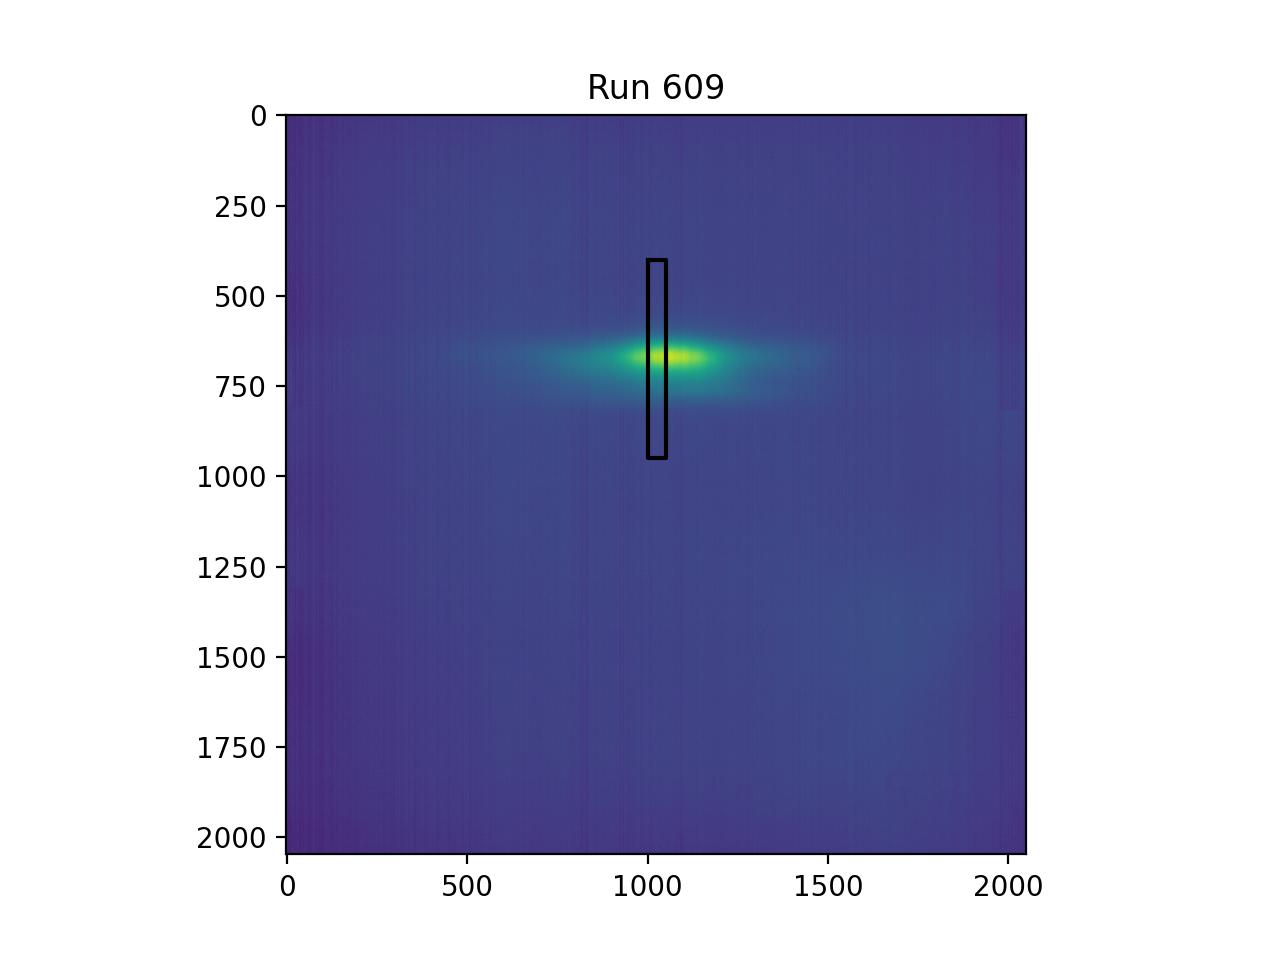

<IPython.core.display.Javascript object>


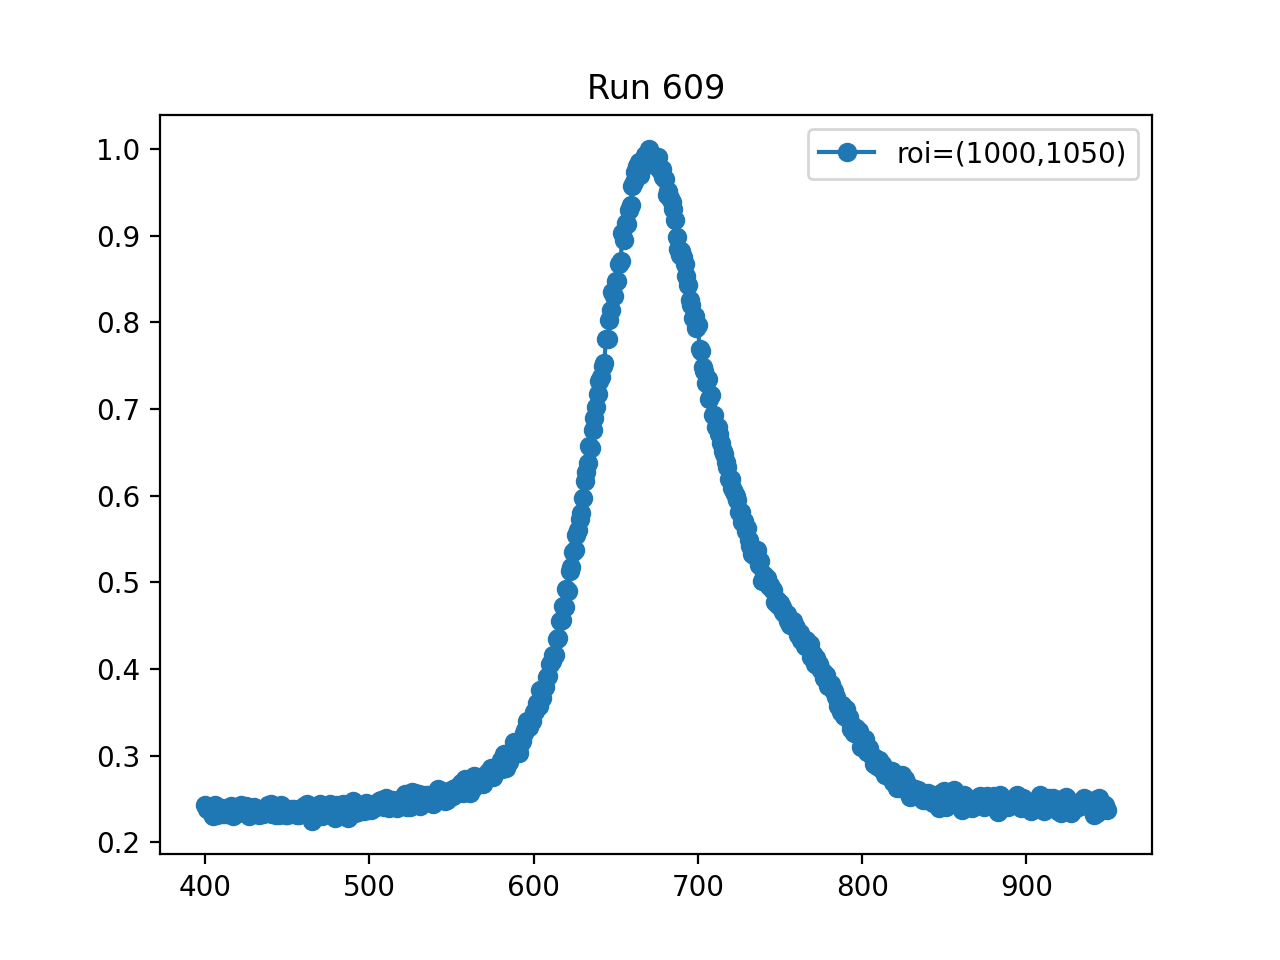

In [7]:
plt.figure()
plt.imshow(imgsum)
plt.plot([x0,x1,x1,x0,x0],[y0,y0,y1,y1,y0],'k')
plt.title('Run {0}'.format(run))

yvec1 = np.arange(y0,y1)

plt.figure()
plt.plot(yvec1, proj1/np.amax(proj1), '-o', label='roi=({0},{1})'.format(x0,x1))
plt.title('Run {0}'.format(run))
plt.legend()